In [2]:
!pip install pandas numpy scikit-learn matplotlib joblib


In [3]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report
)
from joblib import dump


Matplotlib is building the font cache; this may take a moment.


In [4]:

data_path = Path("/Users/ishan/Desktop/Telco churn rates.csv")

df = pd.read_csv(data_path)

print("Shape:", df.shape)
df.head()


Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.columns = (
    df.columns.str.strip()
              .str.lower()
              .str.replace(" ", "_")
            
)
df.head(10)


,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,0
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,0
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


In [14]:

import numpy as np
import pandas as pd

# Load CSV from your Mac Desktop
df = pd.read_csv("/Users/ishan/Desktop/Telco churn rates.csv")

# Clean column names
df.columns = (
    df.columns.str.strip()
              .str.lower()
              .str.replace(" ", "_")
)

# Replace stray blanks with NaN
df = df.replace(" ", np.nan)

# Make totalcharges numeric if present; drop missing
if "totalcharges" in df.columns:
    df["totalcharges"] = pd.to_numeric(df["totalcharges"], errors="coerce")
    df = df.dropna(subset=["totalcharges"])

# Drop obvious ID columns if they exist
for c in ("customerid", "id"):
    if c in df.columns:
        df = df.drop(columns=c)

# Map churn -> 1/0
if "churn" not in df.columns:
    raise ValueError("Column 'churn' not found after rename.")
df["churn"] = (
    df["churn"].astype(str).str.strip().str.lower().map({"yes": 1, "no": 0})
)
df = df.dropna(subset=["churn"])
df["churn"] = df["churn"].astype(int)

# One-hot encode remaining categoricals
cat_cols = df.select_dtypes(include="object").columns.tolist()
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Final split into features/target
X = df.drop(columns=["churn"])
y = df["churn"]
print("Shape:", X.shape, "| Churn rate:", y.mean().round(3))


Shape: (7032, 30) | Churn rate: 0.266


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

scaler = StandardScaler(with_mean=False)               # sparse-safe with OHE
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

clf = LogisticRegression(max_iter=500, class_weight="balanced", solver="liblinear")
clf.fit(X_train_s, y_train)

pred  = clf.predict(X_test_s)
proba = clf.predict_proba(X_test_s)[:, 1]

acc = accuracy_score(y_test, pred)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, pred, average="binary")
auc = roc_auc_score(y_test, proba)
print(f"LogReg | Acc:{acc:.3f} Prec:{prec:.3f} Rec:{rec:.3f} F1:{f1:.3f} AUC:{auc:.3f}")


LogReg | Acc:0.726 Prec:0.490 Rec:0.794 F1:0.606 AUC:0.835


              precision    recall  f1-score   support

           0      0.904     0.701     0.790      1033
           1      0.490     0.794     0.606       374

    accuracy                          0.726      1407
   macro avg      0.697     0.747     0.698      1407
weighted avg      0.794     0.726     0.741      1407



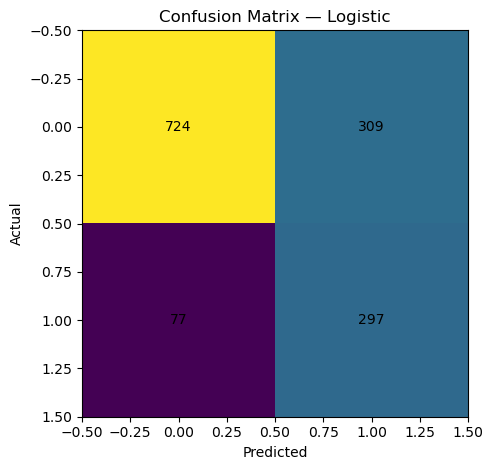

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, pred)
print(classification_report(y_test, pred, digits=3))

plt.imshow(cm, interpolation="nearest")
plt.title("Confusion Matrix — Logistic")
plt.xlabel("Predicted"); plt.ylabel("Actual")
for (i,j), v in np.ndenumerate(cm):
    plt.text(j, i, str(v), ha="center", va="center")
plt.tight_layout(); plt.show()
